<a href="https://colab.research.google.com/github/endzix22/PANDAS/blob/main/machine_learning_databases_echocardiogram_echocardiogram_dataSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
import pandas as pd

In [222]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', error_bad_lines=False,
                   names = ['Survival', 'Still_alive', 'Age_at_heart_attack', 'Pericardial_effusion', 'Fractional_shortening',
                            'Epss', 'Lvdd', 'Wall_motion_score', 'Wall_motion_index', 'Mult', 'Name', 'Group', 'Alive_at_1'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [223]:
data.head()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [224]:
data.tail()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?
131,20,0,62,0,0.15,0,4.51,15.5,1.409,0.786,name,?,?


1. Wstępne przygotowanie danych

In [225]:
dataCopy=data.copy()

In [226]:
dataCopy.shape

(132, 13)

In [227]:
dataCopy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Survival               131 non-null    object
 1   Still_alive            132 non-null    object
 2   Age_at_heart_attack    132 non-null    object
 3   Pericardial_effusion   132 non-null    int64 
 4   Fractional_shortening  132 non-null    object
 5   Epss                   132 non-null    object
 6   Lvdd                   132 non-null    object
 7   Wall_motion_score      132 non-null    object
 8   Wall_motion_index      132 non-null    object
 9   Mult                   132 non-null    object
 10  Name                   132 non-null    object
 11  Group                  132 non-null    object
 12  Alive_at_1             132 non-null    object
dtypes: int64(1), object(12)
memory usage: 93.5 KB


0-Survival, liczba miesiecy które pacjent przezyl

1-Still Alive (0-nie żyje,1-nadal żyje)

12-Alive at 1- wartosc logiczna uzyskana z dwoch pierwszych kolumn. 
(0-pacjent zmarl przed 1 rokiem,lub był obserwowany krócej niż rok
1-pacjent żył po 1 roku)

In [228]:
dataCopy[dataCopy.isna().any(axis=1)]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
49,NaN,?,?,77,?,?,?,?,?,2,?,name,2


In [229]:
dataCopy.dropna(inplace=True)
#zdecydowalysmy sie na usuniecie całego wiersza, bo wystepowaly nam prawie same znaki zapytania

In [230]:
len(dataCopy)

131

0-Survival była zmieniana ze względu na kolumnę 1 i ostatnią



In [231]:
dataCopy['Survival'].value_counts()

0.5     6
1       6
33      5
26      5
0.75    5
27      4
12      4
36      4
29      4
19      4
22      4
25      4
34      3
24      3
10      3
41      3
16      3
31      3
32      3
49      2
38      2
53      2
21      2
.25     2
20      2
37      2
2       2
15      2
52      2
35      2
17      2
13      2
28      2
0.25    2
40      2
5       2
23      1
4       1
3       1
1.25    1
55      1
.03     1
?       1
.75     1
11      1
47      1
9       1
45      1
7       1
19.5    1
46      1
03      1
48      1
44      1
50      1
57      1
7.5     1
Name: Survival, dtype: int64

In [232]:
dataCopy.loc[dataCopy['Survival'] == ".25"]


,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
70,.25,1,86,0,0.225,12.2,5.20,24,2.18,0.786,name,2,1
76,.25,1,68,0,0.22,21.7,4.85,15,1.15,0.928,name,2,?


In [233]:
dataCopy['Survival'].replace(to_replace=['.25'],value='25',inplace=True)


In [234]:
dataCopy.loc[dataCopy['Survival'] == ".03"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
77,.03,1,?,0,0.26,19.4,4.77,21,2.1,0.714,name,2,1


In [235]:
dataCopy['Survival'].replace(to_replace=['.03'],value='30',inplace=True)

In [236]:
dataCopy.loc[dataCopy['Survival'] == "?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
94,?,1,61,0,0.20,9.4,4.02,15.67,1.42,0.786,name,2,1


In [237]:
dataCopy['Survival'].replace(to_replace=['?'],value='28',inplace=True)

In [238]:
dataCopy.loc[dataCopy['Survival'] == ".75"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
108,.75,1,78,0,0.23,40,6.23,14,1.4,0.714,name,2,1


In [239]:
dataCopy['Survival'].replace(to_replace=['.75'],value='75',inplace=True)

In [240]:
dataCopy.loc[dataCopy['Survival'] == "0.5"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
14,0.5,1,62,0,0.120,23,5.800,11.67,2.330,0.358,name,1,1
16,0.5,1,69,1,0.260,11,4.650,18,1.640,0.784,name,1,1
17,0.5,1,62.529,1,0.070,20,5.200,24,2,0.857,name,1,1
22,0.5,1,73,0,0.230,12.733,6.060,7.5,1.500,0.360,name,1,1
63,0.5,1,59,0,0.13,16.4,4.96,17.83,1.37,0.928,name,2,?
90,0.5,1,67,0,0.155,11.3,5.16,13,1,0.928,name,2,?


In [241]:
dataCopy['Survival'].replace(to_replace=['0.5'],value='50',inplace=True)

In [242]:
dataCopy.loc[dataCopy['Survival'] == "0.75"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
20,0.75,1,69,0,0.150,12,5.390,19.5,1.625,0.857,name,1,1
21,0.75,1,85,1,0.180,19,5.460,13.83,1.380,0.710,name,1,1
66,0.75,1,50,0,0.14,11.4,4.75,10,2.5,0.28,name,2,?
83,0.75,1,78,0,0.05,10,4.44,15,1.36,0.786,name,2,1
84,0.75,1,61,0,?,?,?,28,2.33,0.857,name,2,1


In [243]:
dataCopy['Survival'].replace(to_replace=['0.75'],value='75',inplace=True)

In [244]:
dataCopy.loc[dataCopy['Survival'] == "0.25"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
28,0.25,1,75,0,?,?,?,?,1,?,name,2,?
48,0.25,1,63,1,?,?,?,23,2.300,0.714,name,2,1


In [245]:
dataCopy['Survival'].replace(to_replace=['0.25'],value='25',inplace=True)

In [246]:
dataCopy.loc[dataCopy['Survival'] == "1.25"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
104,1.25,1,63,0,0.30,6.9,3.52,18.16,1.51,0.857,name,2,1


In [247]:
dataCopy['Survival'].replace(to_replace=['1.25'],value='12.5',inplace=True)

In [248]:
dataCopy.loc[dataCopy['Survival'] == "03"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
32,03,1,?,0,?,12,?,6,3,0.140,name,2,?


In [249]:
dataCopy['Survival'].replace(to_replace=['03'],value='3',inplace=True)

In [250]:
dataCopy['Survival']=dataCopy['Survival'].astype('float64')

In [251]:
dataCopy['Survival'].mean()

28.96564885496183

1. STILL_ALIVE

In [252]:
dataCopy['Still_alive'].value_counts()

0    88
1    43
Name: Still_alive, dtype: int64

In [253]:
dataCopy['Still_alive']=dataCopy['Still_alive'].astype(int)

Naszym targetem jest "Alive at 1",
żywy na poziomie 1 — wartość logiczna. Pochodzi z dwóch pierwszych atrybutów.

0 oznacza, że ​​pacjent zmarł po 1 roku lub był obserwowany krócej niż 1 rok. 

1 oznacza, że ​​pacjent żył po 1 roku.

In [254]:
dataCopy.drop(columns='Name',inplace=True)

In [255]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               131 non-null    float64
 1   Still_alive            131 non-null    int64  
 2   Age_at_heart_attack    131 non-null    object 
 3   Pericardial_effusion   131 non-null    int64  
 4   Fractional_shortening  131 non-null    object 
 5   Epss                   131 non-null    object 
 6   Lvdd                   131 non-null    object 
 7   Wall_motion_score      131 non-null    object 
 8   Wall_motion_index      131 non-null    object 
 9   Mult                   131 non-null    object 
 10  Group                  131 non-null    object 
 11  Alive_at_1             131 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 13.3+ KB


In [256]:
dataCopy['Age_at_heart_attack'].value_counts()

62        10
57         8
61         8
63         7
59         7
64         7
60         6
54         6
55         5
70         5
?          5
65         5
66         5
68         4
73         4
56         3
69         3
67         3
78         3
58         2
79         2
50         2
71         2
52         2
72         2
46         2
80         1
47         1
75         1
35         1
81         1
85         1
62.529     1
51         1
77         1
86         1
74         1
53         1
48         1
Name: Age_at_heart_attack, dtype: int64

In [257]:
dataCopy.loc[dataCopy['Age_at_heart_attack']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
32,3.0,1,?,0,?,12,?,6,3,0.140,2,?
77,30.0,1,?,0,0.26,19.4,4.77,21,2.1,0.714,2,1
116,37.0,0,?,0,0.26,0,4.38,9,1,0.64,?,?
119,28.0,0,?,0,0.23,19.1,5.49,12,1.20,0.71,?,?
125,17.0,0,?,0,0.09,6.80,4.96,13,1.08,0.857,?,?


JAK ZAMIENIĆ ZE STRINGÓW (OBJECT) NA FLOAT

In [258]:
dataCopy['Age_at_heart_attack'] = pd.to_numeric(dataCopy['Age_at_heart_attack'], errors='coerce').astype('float64')

In [259]:
dataCopy['Age_at_heart_attack'] = dataCopy['Age_at_heart_attack'].fillna(dataCopy['Age_at_heart_attack'].mean())

Teraz czas na Pericardial_effusion

"wysięk osierdziowy – binarny. Wysięk osierdziowy to płyn wokół serca. 0=brak płynu, 1=płyn"

In [260]:
dataCopy['Pericardial_effusion'].value_counts()

0    107
1     24
Name: Pericardial_effusion, dtype: int64

In [261]:
dataCopy['Pericardial_effusion']=dataCopy['Pericardial_effusion'].astype(int)

Teraz czas na Fractional_shortening

skrócenie ułamkowe – miara kurczliwości wokół serca niższe liczby są coraz bardziej nieprawidłowe

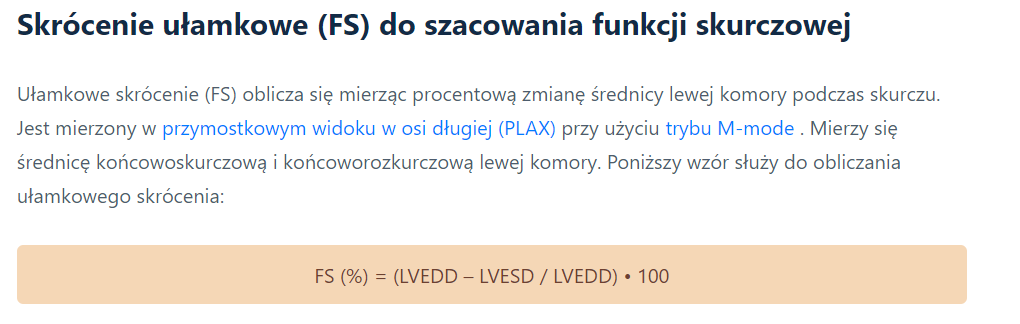

Frakcja wyrzutowa lewej komory poniżej 52% u mężczyzn i poniżej 54% u kobiet jest uważana za nieprawidłową funkcję skurczową lewej komory.

In [262]:
dataCopy['Fractional_shortening'].value_counts()

?        7
0.20     6
0.260    4
0.150    4
0.17     4
        ..
0.11     1
0.180    1
0.220    1
0.36     1
0.09     1
Name: Fractional_shortening, Length: 73, dtype: int64

In [263]:
dataCopy.loc[dataCopy['Fractional_shortening']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
27,29.0,0,55.000000,0,?,7,?,2,1,2,2,?
28,25.0,1,75.000000,0,?,?,?,?,1,?,2,?
32,3.0,1,62.813722,0,?,12,?,6,3,0.140,2,?
34,35.0,0,63.000000,0,?,10,?,14,1.170,0.857,2,0
36,16.0,0,63.000000,1,?,?,5.310,5,1,0.357,2,0
48,25.0,1,63.000000,1,?,?,?,23,2.300,0.714,2,1
84,75.0,1,61.000000,0,?,?,?,28,2.33,0.857,2,1


In [264]:
dataCopy.drop(index=28,inplace=True)

In [265]:
dataCopy.loc[dataCopy['Fractional_shortening']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
27,29.0,0,55.000000,0,?,7,?,2,1,2,2,?
32,3.0,1,62.813722,0,?,12,?,6,3,0.140,2,?
34,35.0,0,63.000000,0,?,10,?,14,1.170,0.857,2,0
36,16.0,0,63.000000,1,?,?,5.310,5,1,0.357,2,0
48,25.0,1,63.000000,1,?,?,?,23,2.300,0.714,2,1
84,75.0,1,61.000000,0,?,?,?,28,2.33,0.857,2,1


In [266]:

dataCopy['Fractional_shortening'] = pd.to_numeric(dataCopy['Fractional_shortening'], errors='coerce').astype('float64')

In [267]:
dataCopy['Fractional_shortening'].mean()

0.21673387096774194

In [268]:
dataCopy['Fractional_shortening'] = dataCopy['Fractional_shortening'].fillna(dataCopy['Fractional_shortening'].mean())

In [269]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    object 
 6   Lvdd                   130 non-null    object 
 7   Wall_motion_score      130 non-null    object 
 8   Wall_motion_index      130 non-null    object 
 9   Mult                   130 non-null    object 
 10  Group                  130 non-null    object 
 11  Alive_at_1             130 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.2+ KB


image.png

zrodło: https://archive.ics.uci.edu/ml/datasets/echocardiogram

In [270]:
dataCopy.drop(columns='Mult',inplace=True)

image.png

zrodło: https://archive.ics.uci.edu/ml/datasets/echocardiogram

In [271]:
dataCopy.drop(columns='Group',inplace=True)

In [272]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    object 
 6   Lvdd                   130 non-null    object 
 7   Wall_motion_score      130 non-null    object 
 8   Wall_motion_index      130 non-null    object 
 9   Alive_at_1             130 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 11.2+ KB


5-EPSS


In [273]:
dataCopy['Epss'].value_counts()

?         13
0          7
12         4
9          3
5          3
          ..
9.8        1
18.6       1
15.600     1
24.600     1
7.00       1
Name: Epss, Length: 92, dtype: int64

In [274]:
dataCopy.loc[dataCopy['Epss']=="?"]
#im większy, tym gorzej

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Alive_at_1
30,1.0,1,65.0,0,0.150000,?,5.050,10,1,?
36,16.0,0,63.0,1,0.216734,?,5.310,5,1,0
38,19.0,0,68.0,0,0.510000,?,3.880,15,1.670,0
43,46.0,0,56.0,0,0.330000,?,3.590,14,1,0
45,37.0,0,64.0,0,0.090000,?,?,12,2,?
46,19.5,1,81.0,0,0.120000,?,?,9,1.250,0
48,25.0,1,63.0,1,0.216734,?,?,23,2.300,1
51,7.0,1,61.0,1,0.270000,?,?,9,1.500,1
59,38.0,0,68.0,0,0.290000,?,4.41,14,1.167,?
61,9.0,0,73.0,0,0.120000,?,6.78,16.67,1.39,?


In [275]:
dataCopy['Epss'] = pd.to_numeric(dataCopy['Epss'], errors='coerce').astype('float64')

In [276]:
dataCopy['Epss'].mean()

12.16476923076923

In [277]:
dataCopy['Epss'] = dataCopy['Epss'].fillna(dataCopy['Epss'].mean())



 6   Lvdd 

lvdd -- wymiar końcoworozkurczowy lewej komory. Jest to miara wielkości serca pod koniec rozkurczu. Duże serca bywają chorymi sercami.


In [278]:
dataCopy['Lvdd'].value_counts()

?        9
4.48     3
5.47     2
4.490    2
4.650    2
        ..
4.360    1
3.880    1
5.310    1
4.070    1
4.51     1
Name: Lvdd, Length: 106, dtype: int64

In [279]:
dataCopy.loc[dataCopy['Lvdd']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Alive_at_1
27,29.0,0,55.000000,0,0.216734,7.000000,?,2,1,?
32,3.0,1,62.813722,0,0.216734,12.000000,?,6,3,?
34,35.0,0,63.000000,0,0.216734,10.000000,?,14,1.170,0
37,1.0,1,65.000000,0,0.060000,23.600000,?,21.500,2.150,1
45,37.0,0,64.000000,0,0.090000,12.164769,?,12,2,?
46,19.5,1,81.000000,0,0.120000,12.164769,?,9,1.250,0
48,25.0,1,63.000000,1,0.216734,12.164769,?,23,2.300,1
51,7.0,1,61.000000,1,0.270000,12.164769,?,9,1.500,1
84,75.0,1,61.000000,0,0.216734,12.164769,?,28,2.33,1


In [280]:
dataCopy['Lvdd'] = pd.to_numeric(dataCopy['Lvdd'], errors='coerce').astype('float64')

In [281]:
dataCopy['Lvdd'].median()

4.65

In [282]:
dataCopy['Lvdd'] = dataCopy['Lvdd'].fillna(dataCopy['Epss'].median())

 7   Wall_motion_score

 wall-motion-score – miara ruchu segmentów lewej komory

In [283]:
dataCopy.drop(columns='Wall_motion_score',inplace=True)

8 wall-motion-index – równa się wall-motion-score podzielona przez liczbę widocznych segmentów. Zwykle na echokardiogramie widocznych jest 12-13 segmentów. Użyj tej zmiennej ZAMIAST oceny ruchu ściany.

In [284]:
dataCopy['Wall_motion_index'].value_counts()

1        41
1.08      3
1.27      3
2         3
1.500     2
         ..
1.05      1
1.700     1
2.5       1
1.367     1
1.409     1
Name: Wall_motion_index, Length: 66, dtype: int64

In [285]:
dataCopy.loc[dataCopy['Wall_motion_index']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_index,Alive_at_1
50,2.0,1,56.0,1,0.04,14.0,5.0,?,1


In [286]:
dataCopy['Wall_motion_index'].replace(to_replace=['?'],value='1',inplace=True)

In [287]:
dataCopy['Wall_motion_index']=dataCopy['Wall_motion_index'].astype('float64')

13. żywy na poziomie 1 — wartość logiczna. Pochodzi z dwóch pierwszych atrybutów. 0 oznacza, że ​​pacjent zmarł po 1 roku lub był obserwowany krócej niż 1 rok. 1 oznacza, że ​​pacjent żył po 1 roku.

survival powyzej 12 miesiecy i still alive true to zastap '?' jedynka

In [288]:
dataCopy['Alive_at_1'].value_counts()

?    56
0    50
1    24
Name: Alive_at_1, dtype: int64

In [289]:
dataCopy.shape

(130, 9)

In [290]:

for i in range(len(dataCopy)):
  if [(dataCopy['Still_alive']==True)&(dataCopy['Survival']>12.0)]:
    dataCopy['Alive_at_1'].replace(to_replace=['?'],value='1',inplace=True)
  else:
    dataCopy['Alive_at_1'].replace(to_replace=['?'],value='0',inplace=True)



In [291]:
dataCopy['Alive_at_1'].value_counts()

1    80
0    50
Name: Alive_at_1, dtype: int64

In [292]:
dataCopy['Alive_at_1']=dataCopy['Alive_at_1'].astype(int)

In [293]:
dataCopy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 131
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    float64
 6   Lvdd                   130 non-null    float64
 7   Wall_motion_index      130 non-null    float64
 8   Alive_at_1             130 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 10.2 KB


In [296]:
dataCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
Survival,130.0,28.996154,17.514058,1.00,17.000,27.000000,37.7500,75.00
Still_alive,130.0,0.323077,0.469461,0.00,0.000,0.000000,1.0000,1.00
Age_at_heart_attack,130.0,62.719982,8.140816,35.00,57.250,62.000000,67.0000,86.00
Pericardial_effusion,130.0,0.184615,0.389486,0.00,0.000,0.000000,0.0000,1.00
Fractional_shortening,130.0,0.216734,0.104983,0.01,0.150,0.216734,0.2675,0.61
Epss,130.0,12.164769,6.988935,0.00,7.525,12.000000,14.9500,40.00
Lvdd,130.0,5.264169,2.002808,2.32,4.290,4.735000,5.4225,12.00
Wall_motion_index,130.0,1.378000,0.451850,1.00,1.000,1.216000,1.5075,3.00
Alive_at_1,130.0,0.615385,0.488386,0.00,0.000,1.000000,1.0000,1.00


In [300]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

dataCopy[['Survival','Age_at_heart_attack','Fractional_shortening','Epss','Lvdd','Wall_motion_index']]=scaler.fit_transform(dataCopy[['Survival','Age_at_heart_attack','Fractional_shortening','Epss','Lvdd','Wall_motion_index']])
dataCopy.head()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_index,Alive_at_1
0,-1.031501,0,1.021034,0,0.413720,-0.454577,-0.332902,-0.839797,0
1,-0.572958,0,1.144347,0,1.561187,-0.885488,-0.583517,0.715383,0
2,-0.744912,0,-0.951974,0,0.413720,-1.172762,-0.924354,-0.839797,0
3,1.605121,0,-0.335409,0,0.346785,-0.014761,-0.331398,0.159961,0
4,-0.572958,1,-0.705348,0,-0.542502,1.412701,0.243513,1.937310,0


Usunięcie....
przygotowanie do modelu 